# Dot Product, Angle & Non‑Linear Curve
Generated 2025-05-06 04:27 UTC

This notebook:
1. Generates quadratic data with noise
2. Fits linear and quadratic models
3. Visualises fits in original 1‑D space
4. Maps data to 2‑D feature space $(x, x^2)$ and shows dot‑product geometry


## 1️⃣ Generate synthetic non‑linear data

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)

# quadratic data
X = np.linspace(-3, 3, 40).reshape(-1,1)
y = X.flatten()**2 + np.random.normal(0, 1, size=X.shape[0])

# quick dataframe
df = pd.DataFrame({'x': X.flatten(), 'y': y})
df.head()


,x,y
0,-3.000000,9.496714
1,-2.846154,7.962327
2,-2.692308,7.896209
3,-2.538462,7.966817
4,-2.384615,5.452237


## 2️⃣ Fit linear vs. quadratic regression

In [2]:

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

lin = LinearRegression().fit(X, y)
quad = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression()).fit(X, y)

print("Linear coeffs:", lin.coef_, lin.intercept_)
print("Quadratic coeffs:", quad.named_steps['linearregression'].coef_, quad.named_steps['linearregression'].intercept_)


Linear coeffs: [-0.1326777] 2.9352093154282146
Quadratic coeffs: [-0.1326777   1.06102146] -0.4110891353877446


## 3️⃣ Visualise fits in original space

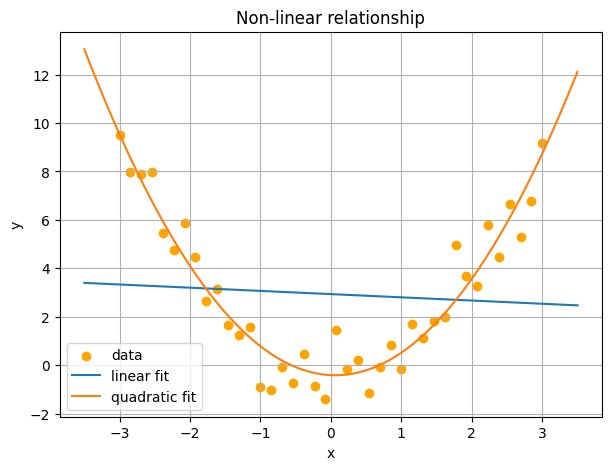

In [3]:

xx = np.linspace(-3.5, 3.5, 200).reshape(-1,1)
plt.figure(figsize=(7,5))
plt.scatter(X, y, label='data', color='orange')
plt.plot(xx, lin.predict(xx), label='linear fit')
plt.plot(xx, quad.predict(xx), label='quadratic fit')
plt.title("Non‑linear relationship")
plt.xlabel("x"); plt.ylabel("y"); plt.legend(); plt.grid(); plt.show()


## 4️⃣ Map to feature space $(x, x^2)$ and show weight vector

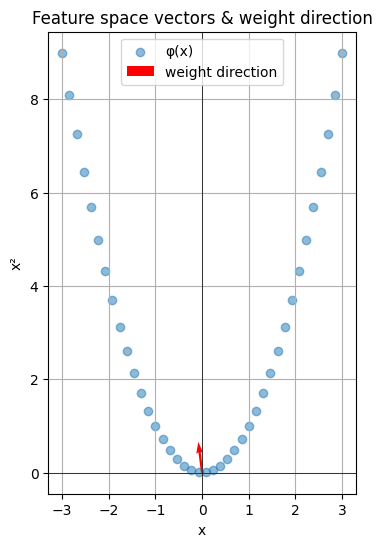

In [4]:

# Map data
phi = np.column_stack([X.flatten(), X.flatten()**2])
w = quad.named_steps['linearregression'].coef_  # [w1, w2]
w_norm = w / np.linalg.norm(w)

# Plot feature vectors and weight vector
plt.figure(figsize=(6,6))
plt.scatter(phi[:,0], phi[:,1], alpha=0.5, label='φ(x)')
plt.quiver(0,0,w_norm[0], w_norm[1], angles='xy', scale_units='xy', scale=1.5, color='red', label='weight direction')
plt.axhline(0,color='k',lw=0.5); plt.axvline(0,color='k',lw=0.5)
plt.gca().set_aspect('equal'); plt.grid(); plt.legend()
plt.title("Feature space vectors & weight direction")
plt.xlabel("x"); plt.ylabel("x²")
plt.show()


## 5️⃣ Dot‑product projection example

In [6]:

sample_x = np.array([[0.2]])
phi_sample = np.array([sample_x.item(), sample_x.item()**2])
proj_len = (phi_sample @ w_norm)  # length along w_norm
proj_vec = proj_len * w_norm

print("φ(x) =", phi_sample)
print("Unit weight vector =", w_norm.round(3))
print("Projection length =", proj_len.round(3))

# Visualise
plt.figure(figsize=(6,6))
plt.scatter(phi[:,0], phi[:,1], alpha=0.3)
plt.quiver(0,0,w_norm[0], w_norm[1], color='red',scale=2,label='ŵ')
plt.quiver(0,0,phi_sample[0],phi_sample[1],color='green',label='φ(2)')
plt.quiver(0,0,proj_vec[0],proj_vec[1],color='purple',linestyle='--',label='projection')
plt.gca().set_aspect('equal'); plt.grid(); plt.legend()
plt.title("Projection of φ(2) onto weight direction")
plt.xlabel("x"); plt.ylabel("x²")
plt.show()


φ(x) = [0.2  0.04]
Unit weight vector = [-0.124  0.992]
Projection length = 0.015


ValueError: At least one value in the dash list must be positive

<Figure size 600x600 with 1 Axes>